# Исследование рынка компьютерных игр

## Цели работы и исходные данные

**Цель данной работы** выявить закономерности, определяющие успешность компьютерной игры.  

Это позволит интернет-магазину определить стратегию на 2017 год, сделать ставку на потенциально наиболее популярные продукты и спланировать рекламные кампании. 

**Предоставленные данные:**  

Для анализа используется набор данных собранных из открытых источников об играх, выходивших в период с 1980 по 2016 гг.

**Библиотеки**

В данном проекте будут использованы следующие библиотеки языка Python: pandas, matplotlib, numpy, seaborn, scipy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

## Обзор данных

### Основная информация

Ознакомимся с данными. Просмотрим несколько случайных строк из таблицы, информацию о ней, а также выведем списки уникальных значений для всех столбцов датафрейма.

In [2]:
df = pd.read_csv("games.csv")
display(df.sample(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6118,LEGO The Lord of the Rings,PSV,2012.0,Action,0.09,0.13,0.00,0.06,54.0,5.6,E10+
9427,Dengeki Bunko Fighting Climax,PSV,2014.0,Fighting,0.04,0.00,0.08,0.01,75.0,8.5,T
14386,Airship Q,PSV,2015.0,Platform,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3083,Animaniacs Ten Pin Alley,PS,1998.0,Sports,0.36,0.25,0.00,0.04,NaN,NaN,NaN
6940,Bakugan: Battle Brawlers,PS3,2009.0,Action,0.19,0.03,0.00,0.02,63.0,8.2,E


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведенные данные позволяют представить дальнейший план действий подготовки информации к анализу. Они также помогают оценить, каким образом можно будет проанализировать влияние различных факторов на популярность компьютерных игр.  

Заметим, что имена столбцов логичны и отражают содержимое, однако в них присутствуют заглавные буквы. Это стилистически неверно. Приведем названия столбцов к "змеиному шрифту":

In [4]:
df.columns = (df.columns).str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Выведем список уникальных значений для всех столбцов набора данных:

In [5]:
columns_qual_list = df.columns.to_list()

for column in columns_qual_list:
    try:
        list_unique = sorted(df[column].unique())
    except:
        list_unique = df[column].unique()
    print('\033[4m' + '\033[1m' + column, end='' + '\033[0m')
    print(':')
    print(*list_unique, sep=', ')
    print()

name:
Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue, Tetris, New Super Mario Bros., Wii Play, New Super Mario Bros. Wii, Duck Hunt, Nintendogs, Mario Kart DS, Pokemon Gold/Pokemon Silver, Wii Fit, Kinect Adventures!, Wii Fit Plus, Grand Theft Auto V, Grand Theft Auto: San Andreas, Super Mario World, Brain Age: Train Your Brain in Minutes a Day, Pokemon Diamond/Pokemon Pearl, Super Mario Land, Super Mario Bros. 3, Grand Theft Auto: Vice City, Pokemon Ruby/Pokemon Sapphire, Brain Age 2: More Training in Minutes a Day, Pokemon Black/Pokemon White, Gran Turismo 3: A-Spec, Call of Duty: Modern Warfare 3, Pokémon Yellow: Special Pikachu Edition, Call of Duty: Black Ops 3, Call of Duty: Black Ops, Pokemon X/Pokemon Y, Call of Duty: Black Ops II, Call of Duty: Modern Warfare 2, Grand Theft Auto III, Super Smash Bros. Brawl, Mario Kart 7, Animal Crossing: Wild World, Halo 3, Super Mario 64, Pokemon HeartGold/Pokemon SoulSilver, Pokemon Omega Ruby/Pok

Посмотрим основные характеристики числовых данных:

In [6]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Постомрим, есть ли в данных повторяющиеся значения:

In [7]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


In [8]:
name_count = df['name'].value_counts()
print('Количество названий игр, которые встречаются несколько раз:')
name_count.loc[name_count > 1].count()

Количество названий игр, которые встречаются несколько раз:


2805

Установим, почему названия игр повторяются. Просмотрим отсортированный набор данных с повторяющимися играми и попробуем понять, в чем отличие между разными строками.

Сначала создадим столбец с информацией о том, сколько раз название игры встречается в наборе данных.

In [9]:
df = df.merge(name_count, how='left', left_on='name', right_on=name_count.index).drop('name_x', axis=1)
df = df.rename(columns={'name_y': 'name_count'})

In [10]:
df[df['name_count']>5].sort_values(by='name').head(12)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_count
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T,6.0
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T,6.0
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T,6.0
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T,6.0
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN,6.0
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T,6.0
11153,Adventure Time: Finn & Jake Investigations,PS3,2015.0,Action,0.02,0.05,0.00,0.01,NaN,NaN,NaN,6.0
11293,Adventure Time: Finn & Jake Investigations,3DS,2015.0,Action,0.03,0.05,0.00,0.01,NaN,NaN,NaN,6.0
13043,Adventure Time: Finn & Jake Investigations,WiiU,2015.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN,6.0
11665,Adventure Time: Finn & Jake Investigations,X360,2015.0,Action,0.03,0.05,0.00,0.01,NaN,NaN,NaN,6.0


Как видно из таблицы, строки с повторами в названиях игр отражают информацию для разных игровых платформ. То есть, это не дубликаты.

### Итоги обзора данных

Исходный набор данных содержит 11 столбцов со следующей информацией:

•	`name` — название игры  
•	`platform` — платформа  
•	`year_of_releas` — год выпуска  
•	`genre` — жанр игры  
•	`na_sales` — продажи в Северной Америке (миллионы проданных копий)  
•	`eu_sales` — продажи в Европе (миллионы проданных копий)  
•	`jp_sales` — продажи в Японии (миллионы проданных копий)  
•	`other_sales` — продажи в других странах (миллионы проданных копий)  
•	`critic_score` — оценка критиков (максимум 100)  
•	`user_score` — оценка пользователей (максимум 10)  
•	`rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Первичный обзор позволил выделить следующие проблемы:
1. __Пропуски__ в столбцах:
- `name`
- `year_of_release`
- `genre`
- `critic_score`
- `user_score`
- `rating`
2. __Аномалии:__
- значение "tbd" в столбце `user_score`, означающее повидимому "To Be Determined" (будет определено), что можно также считать пропускаии
3. __Типы данных:__
- `year_of_release` - должен быть целочисленный (int)
- `user_score` - должен быть вещественный (float)
 4. __Дубликаты:__
- в столбце `rating` наименование "K-A" является устаревшим названием категории "E".   

Перечисленные недостатки в данных будут отредактированны на этапе предобработки.

## Предварительная обработка данных

### Дубликаты

Устраним неявные дубликаты в столбце 'rating'. Заменим наименование "K-A" на "E":

In [11]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

### Пропуски

#### Доля пропусков по столбцам

Определим процент пропущенных значений в каждом столбце:

In [12]:
print('Доля пустых значений по столбцам в процентах:')
((df.isna().mean()*100)[(df.isna().mean()*100) != 0]
 .sort_values(ascending=False).reset_index()
 .style.background_gradient(cmap='Reds'))

Доля пустых значений по столбцам в процентах:


,index,0
0,critic_score,51.319174
1,rating,40.478612
2,user_score,40.089740
3,year_of_release,1.609333
4,name,0.011965
5,genre,0.011965
6,name_count,0.011965


#### Данные с малым количесвтом пропусков

Пропусков в столбцах `name` и `genre` меньше 1%, и их количество совпадает. Возможно это одни и те же строки. Пропуски в столбце `name_count` совпадают со стобцов `name`. В столбце `year_of_release` количество пропусков также невелико - 1.6%. Удалим нулевые значения в столбце `name` и `year_of_release`: 

In [13]:
df = df.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)
print('Доля пустых значений по столбцам в процентах:')
(df.isna().mean()*100)[(df.isna().mean()*100) != 0].sort_values(ascending=False)

Доля пустых значений по столбцам в процентах:


critic_score    51.453418
rating          40.598395
user_score      40.166626
dtype: float64

Пропуски в столбце `genre` так же исчезли.

#### Пропуски в информации о рейтингах

Заполним часть пропусков в инофрмации о рейтингах ESRB по данным об играх на других платформах.

Создадим таблицу "df_rating" для игр, где данные о рейтинге есть хотя бы на одной из платформ.  
Удалим пропуски и дубликаты, чтобы в таблице остались лишь уникальные названия игр и соответствующий им рейтинг.  
Некоторым играм на разных платформах соответствуют несколько разных рейтингов. Оставим информацию случайным образом лишь об одном рейтинге.

In [14]:
df_rating = df[['name', 'rating']]
df_rating = df_rating.dropna(subset=['rating']).reset_index(drop=True).drop_duplicates()
df_rating['name'] = df_rating['name'].drop_duplicates()

Присоединим таблицу "df_rating" к основному набору данных "df".

In [15]:
df = df.merge(df_rating, how='left', on='name')

Заполним пропуски в изначальных данных о рейтингах `rating_x` данными из присоединенного столбца `rating_y`. Затем удалим столбцы `rating_y` и `name_count` и переименуем `rating_x` обратно в `rating`.

In [16]:
for i in range(df.shape[0]):
    df.loc[df['rating_x'].isna(), 'rating_x'] = df['rating_y']

In [17]:
df = df.drop(['rating_y', 'name_count'], axis=1)
df = df.rename(columns={'rating_x': 'rating'})

Посмотрим, как изменилось соотношение пропусков в общем наборе данных:

In [18]:
(df.isna().mean()*100)[(df.isna().mean()*100) != 0].sort_values(ascending=False)

critic_score    51.453418
user_score      40.166626
rating          38.062515
dtype: float64

Удалось заполнить 2% пропусков в столбце `rating`.

Заполнить пропуски в оставшихся столбцах по косвенным признакам не получится, поэтому сделаем по ним выборку на этапе анализа.

### Типы данных

Изменим тип данных в столбце `year_of_release` на целочисленный (int). Он гораздо больше подходит для обозначения года выпуска.

In [19]:
df['year_of_release'] = df['year_of_release'].astype('int64')
print('Тип данных столбца \'year_of_release\':', df['year_of_release'].dtype)

Тип данных столбца 'year_of_release': int64


Из-за наличия в столбце `user_score` строковых значений (абревиатура "tbd", означающая, что рейтинг будет определен позже), ему автоматически был назначен тип данных "object".
Изменим тип данных в этом столбце на вещественный (float). Для этого предварительно заменим значение "tbd" на пропуск и посмотрим список уникальных значений в данном столбце, чтобы убедиться, что все правильно.

In [20]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
df['user_score'] = df['user_score'].astype('float64')
print(df['user_score'].unique())
print('Тип данных столбца \'user_score\':', df['user_score'].dtype)

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
Тип данных столбца 'user_score': float64


### Создание столбцов с рассчетными характеристиками

Создадим столбец `total_sales`, в котором посчитаем суммарыные продажи по всем регионам.

In [21]:
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df[['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].head()

,total_sales,na_sales,eu_sales,jp_sales,other_sales
0,82.54,41.36,28.96,3.77,8.45
1,40.24,29.08,3.58,6.81,0.77
2,35.52,15.68,12.76,3.79,3.29
3,32.77,15.61,10.93,3.28,2.95
4,31.38,11.27,8.89,10.22,1.00


### Итоги предварительной обработки данных

Готовый к анализу набор данных выглядит следующим образом:

In [22]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [23]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

Большинство недочетов, выявленных на этапе обзора удалось устранить. Однако в наборе данных по прежнему осталось большое количество пропусков в информации об оценках критиков и пользователей, а также о рейтингах ESRB.  
Эти данные нельзя восстановить по косвенным признакам, поэтому при анализе по этим характеристикам нужно будет отфильтровать пропущенные значения.  

## Исследовательский анализ данных

### Динамика выхода новых компьютерных игр за период с 1980 по 2016 год

Проанализируем данные по времени. Для этого построим график, отражающий, какое количество игр было выпущено в разные годы. 

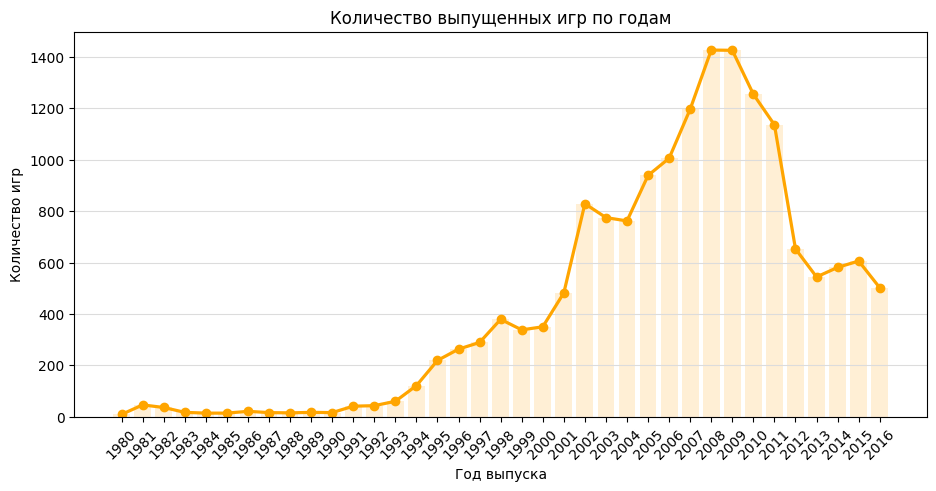

In [24]:
year_grouped = df.groupby('year_of_release')['year_of_release'].count()

fig = plt.figure(figsize=(11, 5))

ax = fig.add_subplot()

plt.bar(year_grouped.index, year_grouped, color='papayawhip')
plt.plot(year_grouped.index, year_grouped, color='orange', linewidth=2.3, marker = 'o')

ax.set(title='Количество выпущенных игр по годам')
ax.grid(axis = 'y', color = 'gainsboro')

ax.set_ylabel('Количество игр')
ax.set_xlabel('Год выпуска')
plt.xticks(year_grouped.index, rotation=45)

plt.show()

На графике отражается следующая динамика развития мира компюютерных игр. До 1994 года новых игры выходило немного - до 100 в год. Начиная с 1995 года началось стремительное развитие индустрии. Количество выпускаемых игр в год выросто с 200 до более чем 1400 игр. Этот пик пришелся на 2008, 2009 года. Далее последовал резкий спад, и к 2011 году количество выпускаемых игр сократилось до примерно 650 в год. После этого динамика выровнялась, количество новых игр по годам колеблется в районе 500-600 штук в год. Однако можно все же сказать о продолжающамся плавном уменьшении количества выпускаемых новых игр.  

Для прогноза на 2017 год лучше всего опираться на данные периода __с 2012 по 2016 года__, так как можно предположить, что динамика этого периода продолжится.

### Анализ продаж по платформам

#### Выбор актуального периода для исследования

Проанализируем, как изменялись продажи игр на различных платформах в разные годы.  

Посмотрим, какие платформы лидируют по продажам во всем мире за доступный период:

In [25]:
df_plaforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Рассмотрим деталее продажи на наиболее успешных платформах - выберем 6 первых строк из получившийся таблицы. Это платформы с продажами более 700 млн.  
Создадим сводную таблицы, отражающую, как менялись продажи на этих платформах в разные годы, и визуализируем получившийся результат:

In [26]:
df_plaforms_pivot = df[df['platform'].isin(df_plaforms.index)].pivot_table(index='year_of_release',
                                                                           columns='platform', 
                                                                           values='total_sales', 
                                                                           aggfunc='sum')
df_plaforms_pivot

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


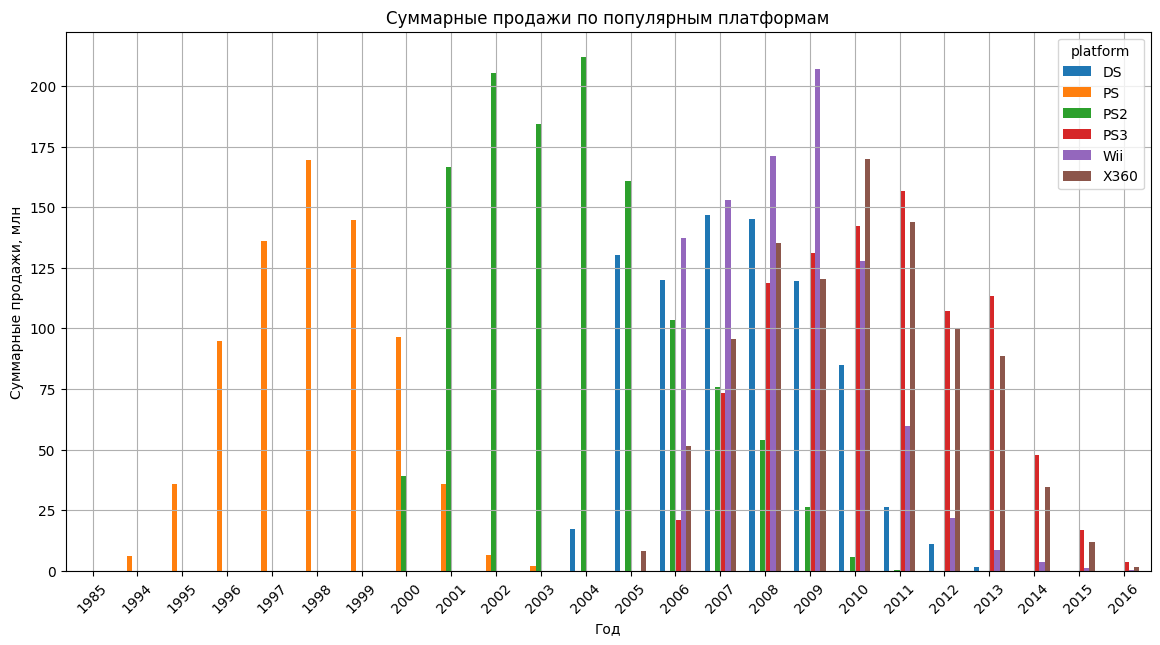

In [27]:
df_plaforms_pivot.plot(kind='bar', grid=True, figsize=(14, 7),
                      width = 0.7,
                      title='Суммарные продажи по популярным платформам',
                      xlabel = 'Год',
                      ylabel = 'Суммарные продажи, млн')

plt.xticks(rotation=45)
plt.show()

                               Суммарные продажи по годам для наиболее успешных игровых платформ


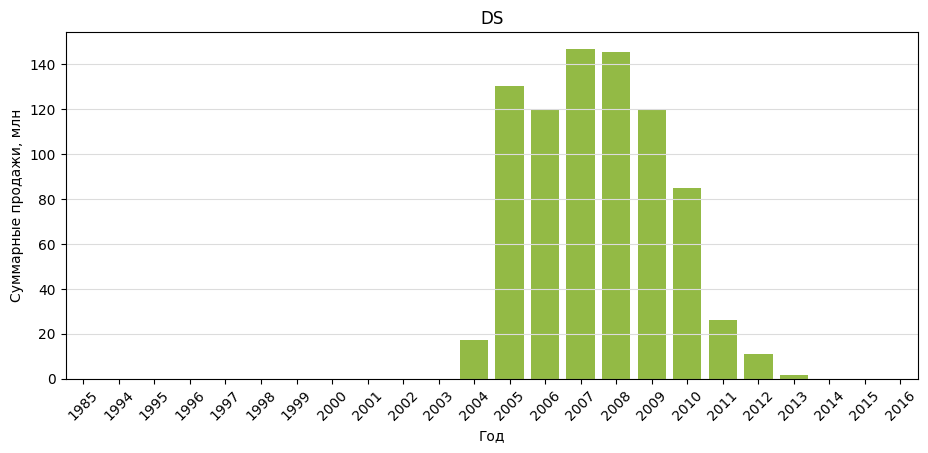

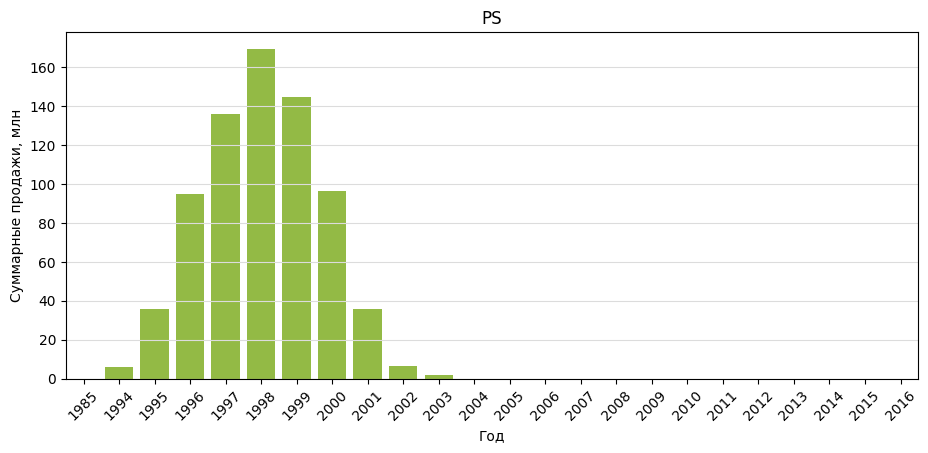

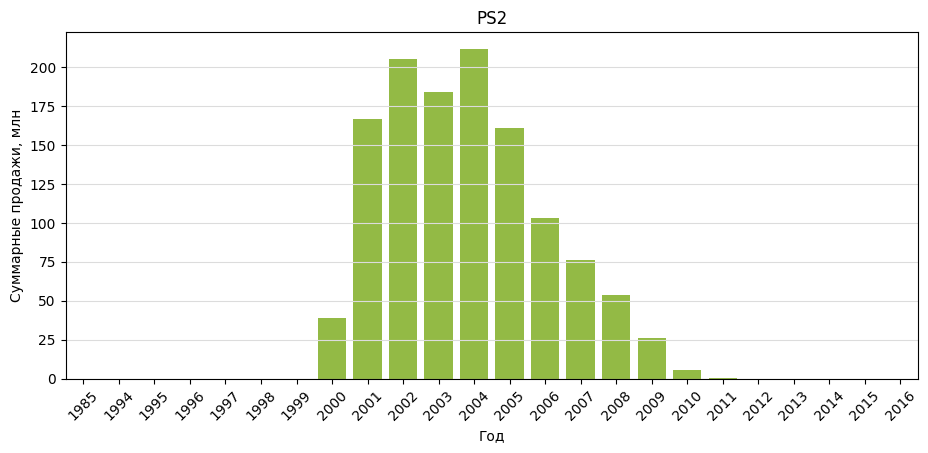

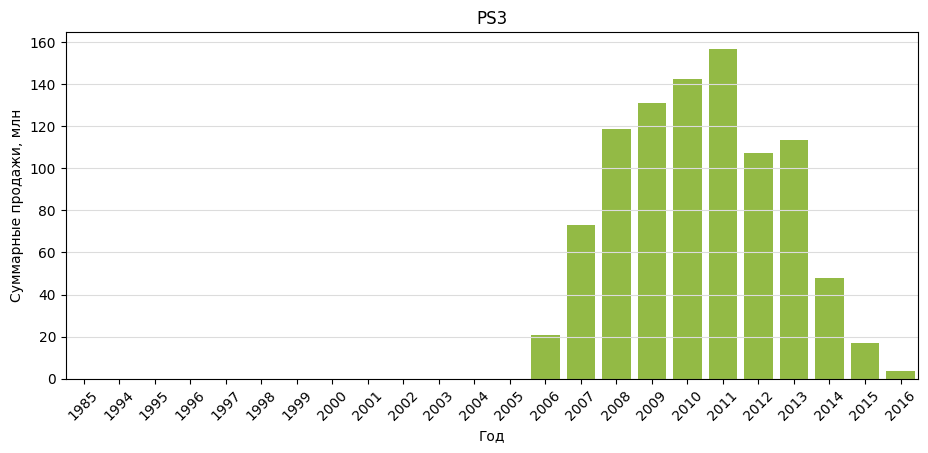

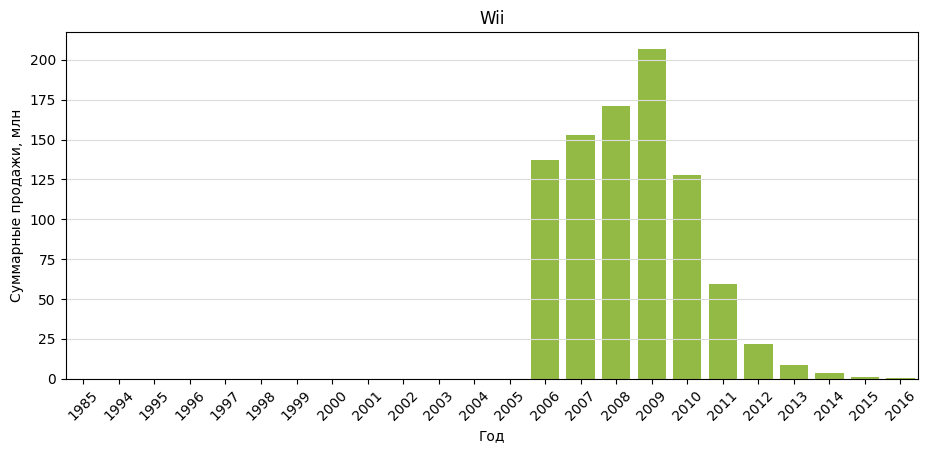

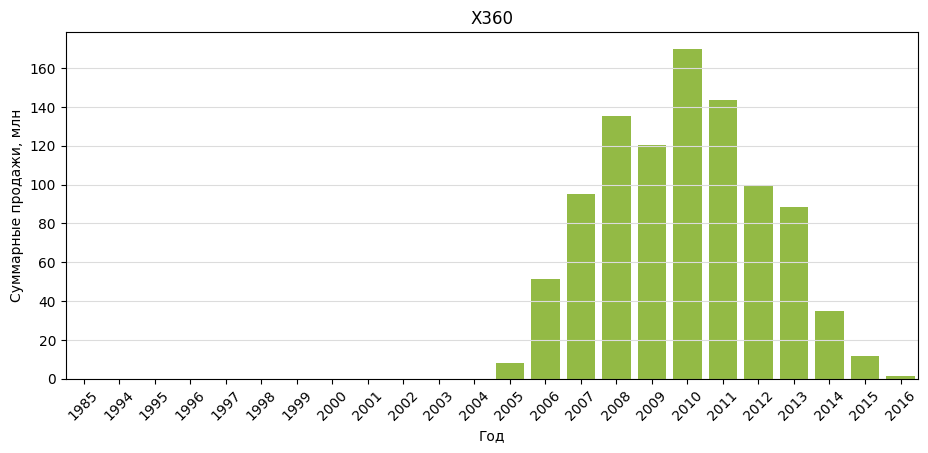

In [28]:
print('                               Суммарные продажи по годам для наиболее успешных игровых платформ')
for column in df_plaforms_pivot.columns:
    year_platform_bar = fig = plt.figure(figsize=(11, 4.5))

    year_platform_bar = sns.barplot(x=df_plaforms_pivot.index, 
                                    y=df_plaforms_pivot.loc[df_plaforms_pivot.index, column], 
                                    color='yellowgreen')
    year_platform_bar.set(title=column)
    year_platform_bar.grid(axis = 'y', color = 'gainsboro')

    year_platform_bar.set_ylabel('Суммарные продажи, млн')
    year_platform_bar.set_xlabel('Год')
    plt.xticks(rotation=45)

    plt.show()

По граффикам видно, что время жизни успешной платформы составляет 10-12 лет. 
Можно выделить три осровных этапа жизни игровой платформы на рынке: рост, пик популярности и спад.

Причем наблюдается динамика двух видов:
1. В первом случае возрастание популярности игры имелет характер близкий к линейному, таким же наблюдается спад спроса на рынке. Столбцатая диаграмма в этом случае имеет почти симметричный вид.
2. Во втором случае платформа пользуется большой популярностью на этапе роста, происходит резкий рост ее продаж в первые годы. Однако после прохождения пика популярности, уровень продаж снижается довольно резко.

Первая динамики характерна для платформ PS и X360.
Вторая модель наблюдается на диаграммах для платформ DS, PS2, PS3, Wii.

Такой перекос во втором случае можно объяснить масштабными рекламными кампаниями.

Рост интереса к платформе происходит в первые 4-6 лет. На пике популярности или в фазе активного роста должны оказаться платформы, начавшие свой жизненный цыкл в 2012-2013 году и позже.

Рассмотрим в дальнейшем исседовании __данные за 2012-2016 года.__

#### Анализ продаж по платформам за актуальный период

Создадим набор данных для рассматриваемого периода:

In [29]:
df_2012_2016 = df[df['year_of_release'] >= 2012]

In [30]:
print('Количество строк в датафрейме \"df_2012_2016\":', df_2012_2016.shape[0])

Количество строк в датафрейме "df_2012_2016": 2886


In [31]:
print('Количество игровых платформ в общем наборе данных:', len(df['platform'].unique()))
print()
print('Количество игровых платформ за 2012-2016 гг.:', len(df_2012_2016['platform'].unique()))
print()
print('Наименования игровых платформ за 2012-2016 гг.:')
print(*df_2012_2016['platform'].unique(), sep=', ')

Количество игровых платформ в общем наборе данных: 31

Количество игровых платформ за 2012-2016 гг.: 11

Наименования игровых платформ за 2012-2016 гг.:
PS3, X360, PS4, 3DS, DS, XOne, WiiU, Wii, PC, PSV, PSP


В новом наборе данных осталось 11 игровых платформ. Посмотрим, на каком этапе развития они находятся и выберем потенциально прибыльне платформы.

Для этого посторим для них столбчатые диаграммы как в прошлом разделе, сначала для каждой платформы в отдельности, а затем соединим их на однои графике для сравнения масштабов продаж разных платформ.

In [32]:
df_2012_2016_pivot = df_2012_2016.pivot_table(index='year_of_release',
                                              columns='platform', 
                                              values='total_sales', 
                                              aggfunc='sum')

               Суммарные продажи по годам для наиболее успешных игровых платформ


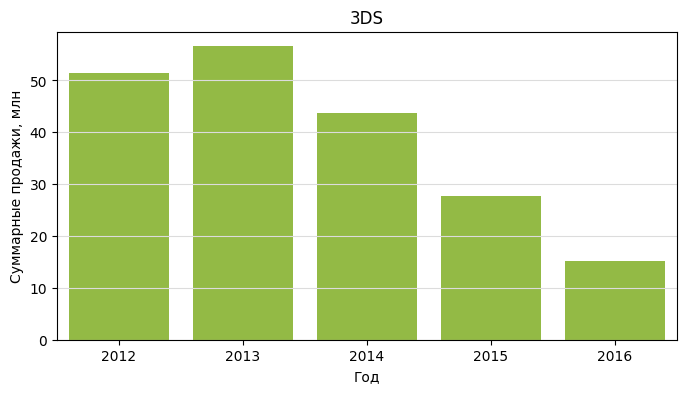

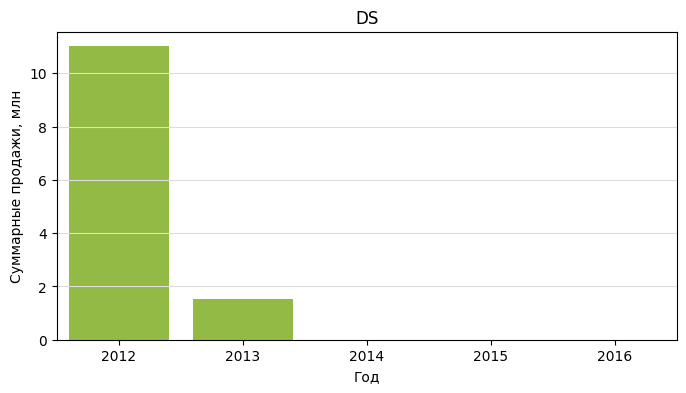

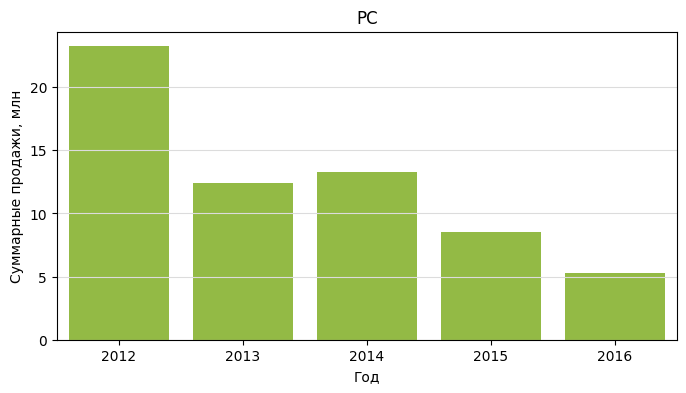

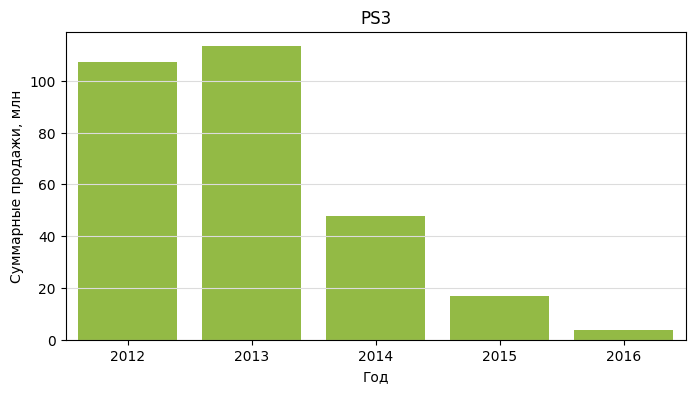

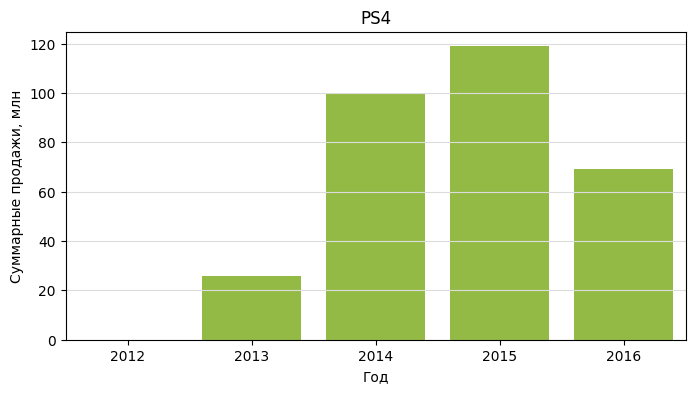

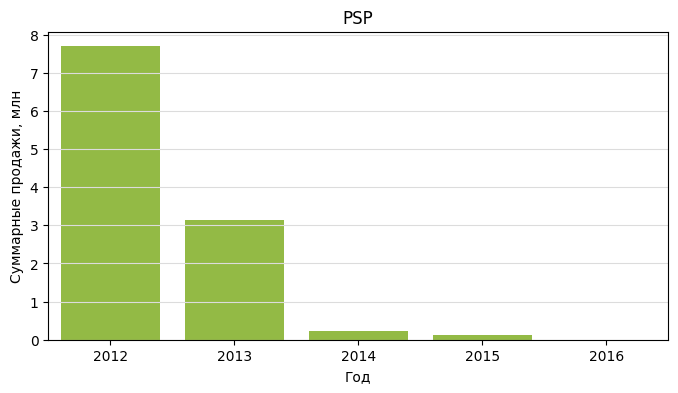

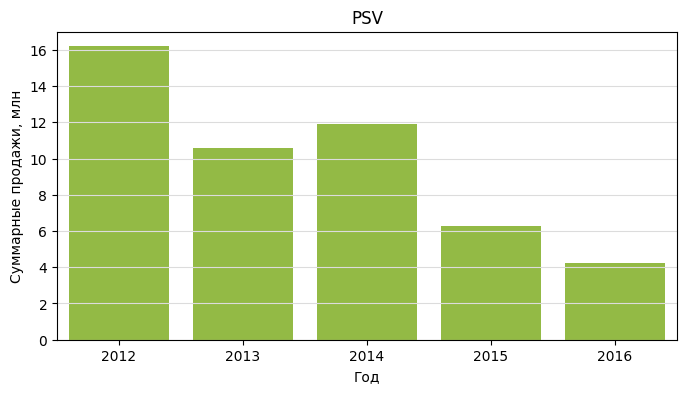

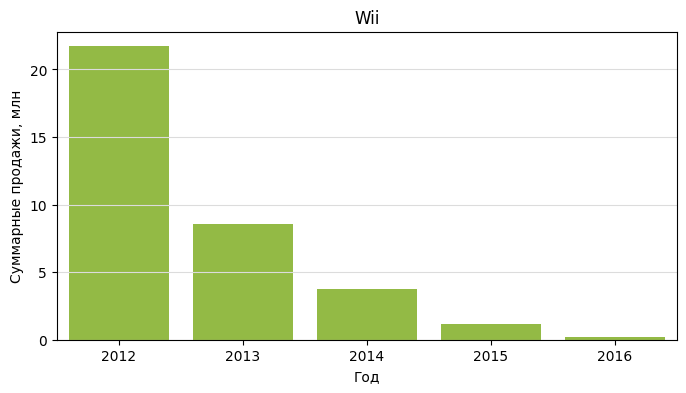

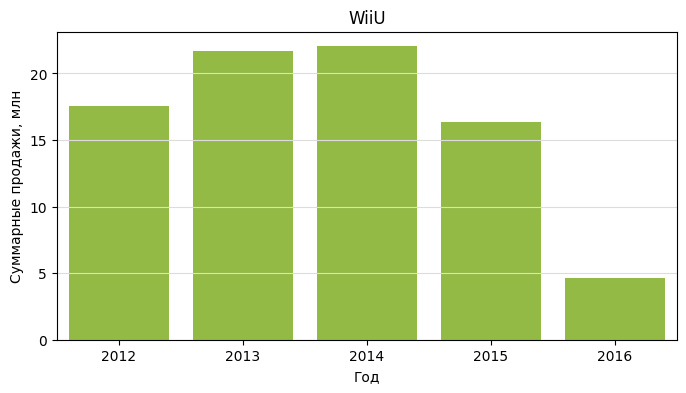

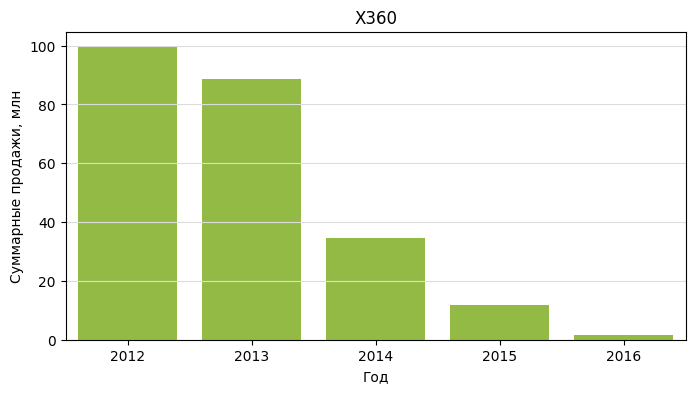

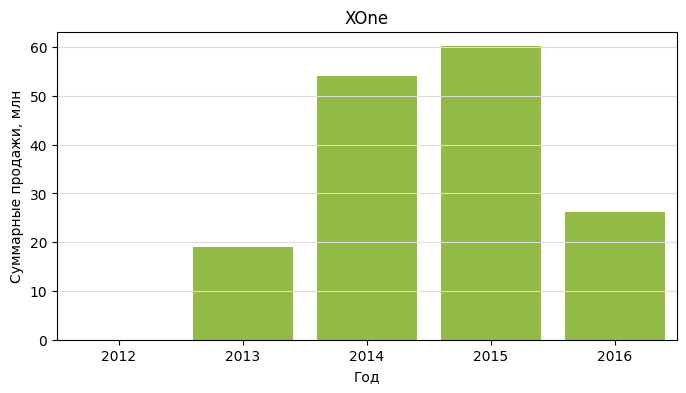

In [33]:
print('               Суммарные продажи по годам для наиболее успешных игровых платформ')
for column in df_2012_2016_pivot.columns:
    year_platform_bar = fig = plt.figure(figsize=(8, 4))

    year_platform_bar = sns.barplot(x=df_2012_2016_pivot.index, 
                                    y=df_2012_2016_pivot.loc[df_2012_2016_pivot.index, column], 
                                    color='yellowgreen')
    year_platform_bar.set(title=column)
    year_platform_bar.grid(axis = 'y', color = 'gainsboro')

    year_platform_bar.set_ylabel('Суммарные продажи, млн')
    year_platform_bar.set_xlabel('Год')

    plt.show()

По диаграммам для каждой платформы из актуального периода видно, что большинство из них уже прошли пиковую точку, и их популярность падает. Следует учесть, что данные за 2016 год представлены неполностью, поэтому снижение продаж в этом году не учитывается.
Можно выделить две платформы, у которых есть потенциал. Это __XOne__ и __PS4__. Обе платформы находятся на стадии роста, и пик их популярности должен прийтись на 2017-2018 гг.

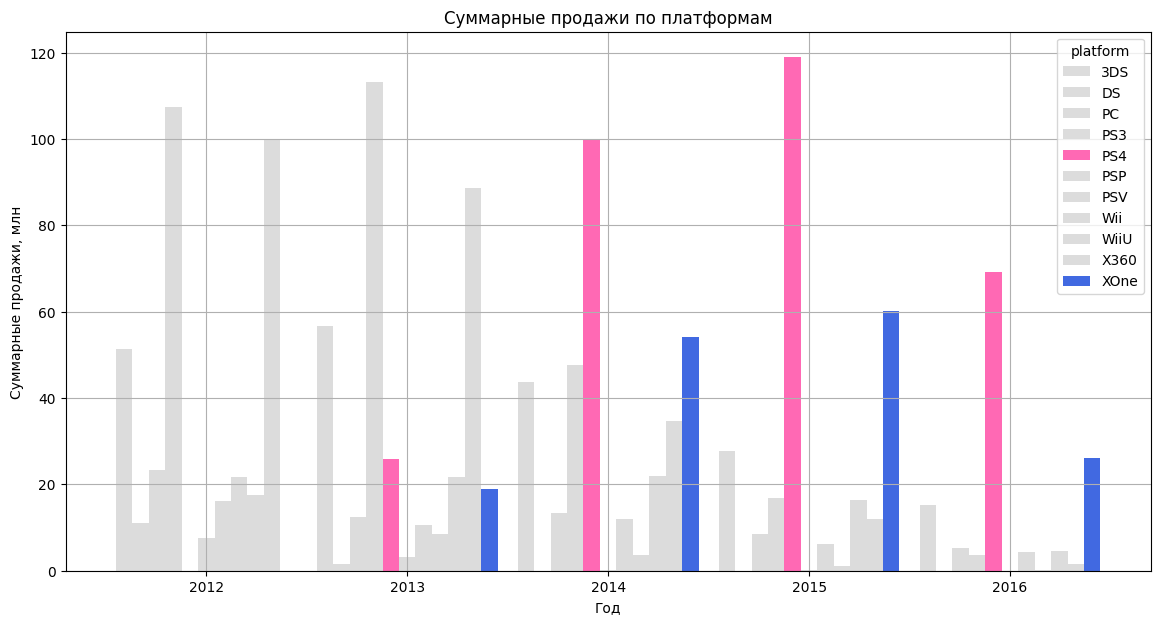

In [34]:
colors = ('gainsboro', 'gainsboro', 'gainsboro', 'gainsboro', 'hotpink', 'gainsboro', 
          'gainsboro', 'gainsboro', 'gainsboro', 'gainsboro', 'royalblue')
df_2012_2016_pivot.plot(kind='bar', 
                        grid=True, 
                        figsize=(14, 7), 
                        width = 0.9, 
                        color = colors,
                        title='Суммарные продажи по платформам',
                        xlabel = 'Год',
                        ylabel = 'Суммарные продажи, млн')


plt.xticks(rotation=0)
plt.show()

На общем для платформ графике заметно, что продажи на XOne примерно в два раза меньше, чем на PS4.
Остальные платформы находятся на стадии спада популярности, и значительно уступают двум выделеным платформам по продажам.

#### Глобальные продажи игр в разбивке по платформам

Построим диаграммы размаха по глобальным продажам игр в разбивке на платформы.

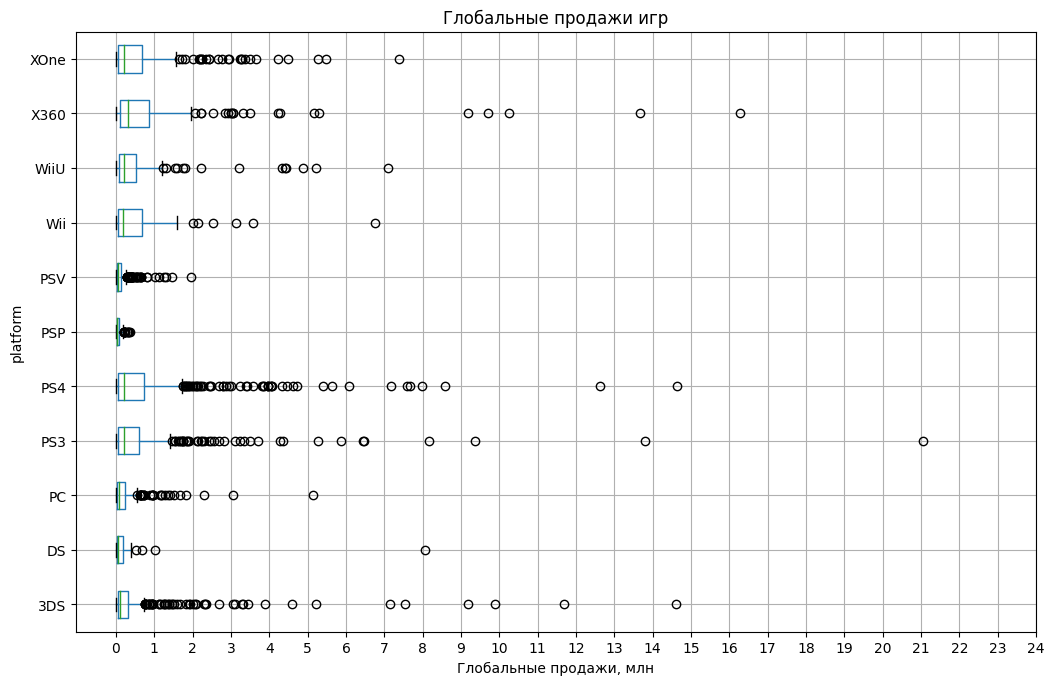

In [35]:
df_2012_2016_boxplot = df_2012_2016.boxplot('total_sales', by='platform', vert=False, figsize=(12,8))
df_2012_2016_boxplot.set(title = 'Глобальные продажи игр', xticks=range(0, 25))
df_2012_2016_boxplot.set_xlabel('Глобальные продажи, млн')
plt.suptitle('')

plt.show()

Из графика видно, что большинство игр собирают до 2 млн в год на наиболее популярных платформах. Однако есть отдельные выбросы, доходящие до 15 и даже до 21 млн.
Посмотрим, какие игры плользуются такой популярностью.

In [36]:
(
df_2012_2016[['name', 'platform', 'year_of_release', 'genre', 'total_sales']]
.sort_values(by=['total_sales'],ascending=False).head(10)
)

,name,platform,year_of_release,genre,total_sales
16,Grand Theft Auto V,PS3,2013,Action,21.05
23,Grand Theft Auto V,X360,2013,Action,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,13.68
42,Grand Theft Auto V,PS4,2014,Action,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,9.90


Игра Grand Theft Auto V собрала в 2013 году 21 миллион на платформе PS3. Высока  ее популярность и на других платформах.

Постоим диаграмму размаха для игры, зарабатывающие менее 2 млн в год:

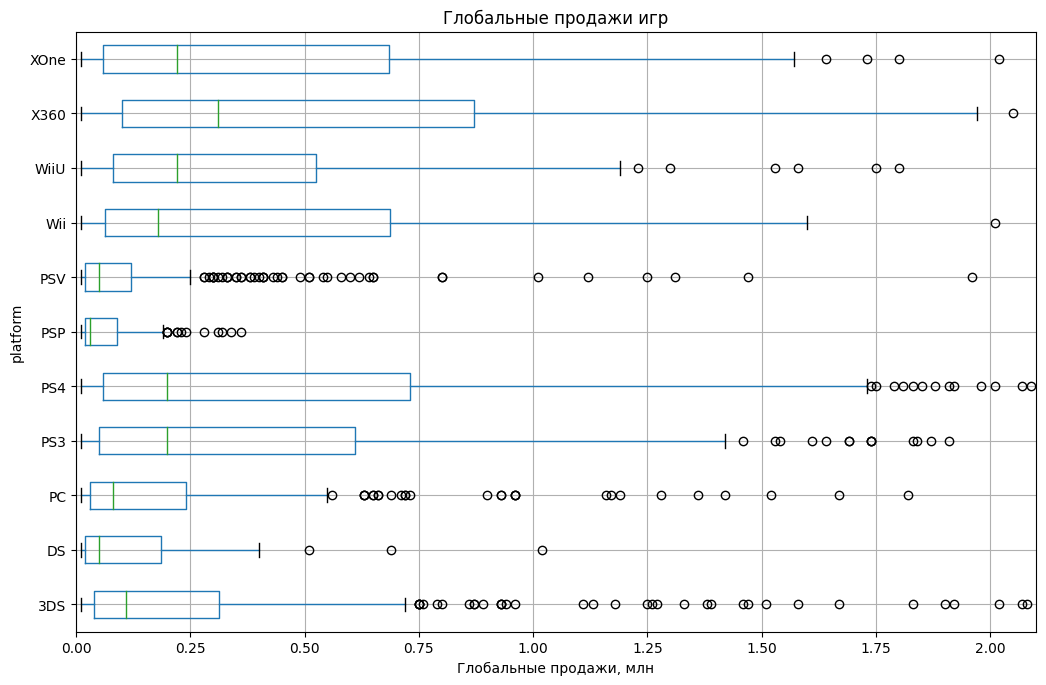

In [37]:
df_2012_2016_boxplot = df_2012_2016.boxplot('total_sales', by='platform', vert=False, figsize=(12,8))
df_2012_2016_boxplot.set(title = 'Глобальные продажи игр', xlim=(0, 2.1))
df_2012_2016_boxplot.set_xlabel('Глобальные продажи, млн')
plt.suptitle('')

plt.show()

Средний заработок большинства игр составляет до 250 тыс. в год.

#### Влияние отызвов на продажи

Проверим влияют ли на продажи игр на разных платформах оценки пользователей и критиков. 

В данных об отзывах были пропуски. Посмотрим, останутся ли они в выборке за 2012-2016 гг.

In [38]:
print('Доля пустых значений по столбцам в процентах:')
(df_2012_2016.isna().mean()*100)[(df_2012_2016.isna().mean()*100) != 0].sort_values(ascending=False)

Доля пустых значений по столбцам в процентах:


critic_score    54.539155
user_score      46.950797
rating          39.085239
dtype: float64

Пропуски остались.  
Удалим их:

In [39]:
df_2012_2016_score = df_2012_2016.dropna(subset=['critic_score', 'user_score']).reset_index(drop=True)
df_2012_2016_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1297 non-null   object 
 1   platform         1297 non-null   object 
 2   year_of_release  1297 non-null   int64  
 3   genre            1297 non-null   object 
 4   na_sales         1297 non-null   float64
 5   eu_sales         1297 non-null   float64
 6   jp_sales         1297 non-null   float64
 7   other_sales      1297 non-null   float64
 8   critic_score     1297 non-null   float64
 9   user_score       1297 non-null   float64
 10  rating           1267 non-null   object 
 11  total_sales      1297 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 121.7+ KB


Пропуски из столбцов с рейтингами удалены. В выборке осталось 1297 строк.

Построим диаграммы рассеяния зависимости рейтингов от продаж игр для разных платформ  и посчитаем коэффициенты корелляции.

In [40]:
df_2012_2016_score[df_2012_2016_score['platform'] == 'PSP']
df_2012_2016_score['platform'].value_counts()

PS4     249
PS3     213
PC      197
X360    171
XOne    165
PSV     106
3DS     100
WiiU     89
Wii       5
DS        1
PSP       1
Name: platform, dtype: int64

Для платформ Wii, PSP и DS слишком мало данных, меньше 30 строк. Не будем рассматривать их в анализе.

In [41]:
platform_list = df_2012_2016_score['platform'].value_counts()[df_2012_2016_score['platform'].value_counts() >= 30].index
platform_list

Index(['PS4', 'PS3', 'PC', 'X360', 'XOne', 'PSV', '3DS', 'WiiU'], dtype='object')


                                                             PS4


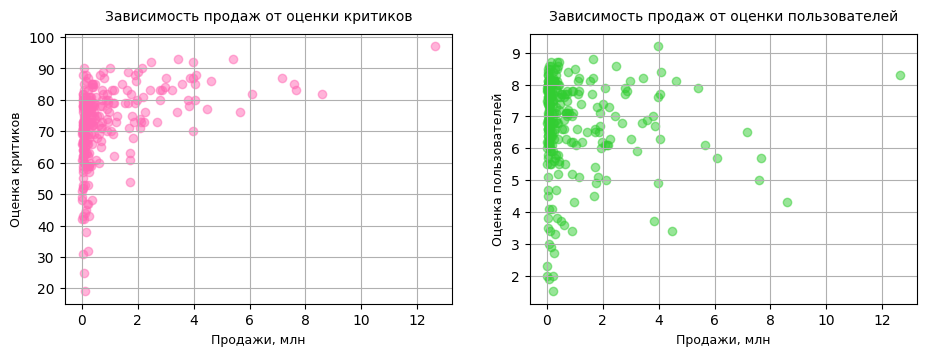

         Kоэффициент корреляции Пирсона для оценки критиков: 0.407
         Kоэффициент корреляции Пирсона для оценки пользователей: -0.032


                                                             PS3


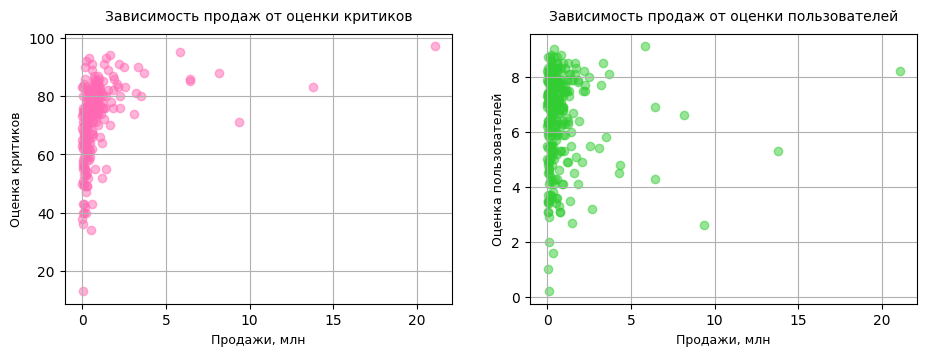

         Kоэффициент корреляции Пирсона для оценки критиков: 0.331
         Kоэффициент корреляции Пирсона для оценки пользователей: -0.005


                                                             PC


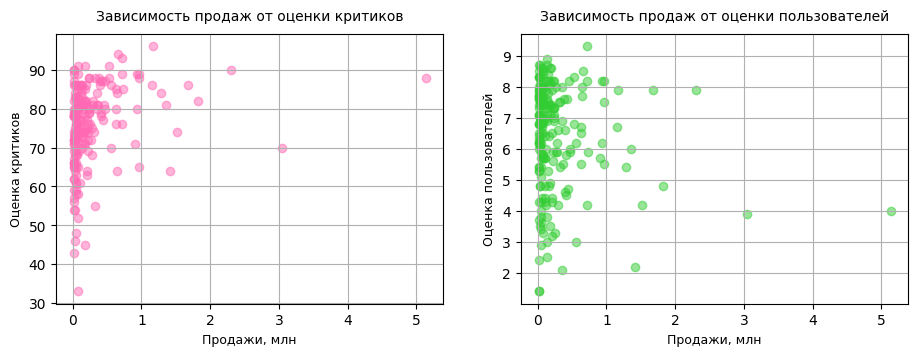

         Kоэффициент корреляции Пирсона для оценки критиков: 0.237
         Kоэффициент корреляции Пирсона для оценки пользователей: -0.122


                                                             X360


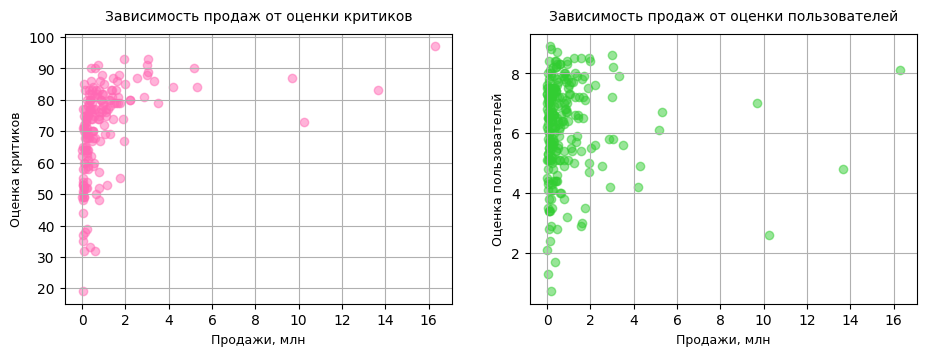

         Kоэффициент корреляции Пирсона для оценки критиков: 0.361
         Kоэффициент корреляции Пирсона для оценки пользователей: 0.006


                                                             XOne


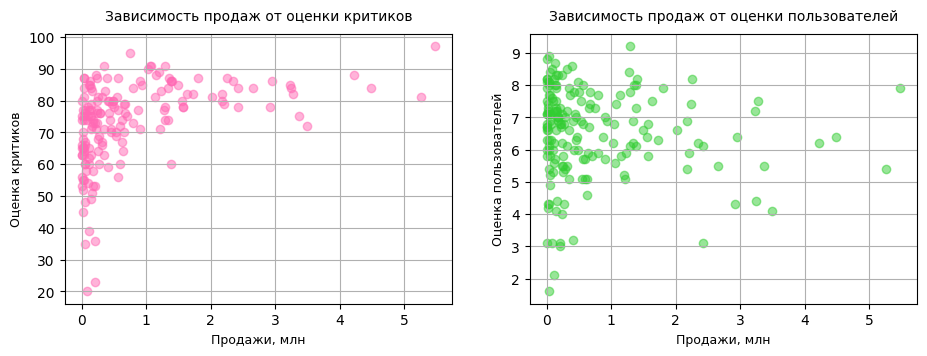

         Kоэффициент корреляции Пирсона для оценки критиков: 0.417
         Kоэффициент корреляции Пирсона для оценки пользователей: -0.069


                                                             PSV


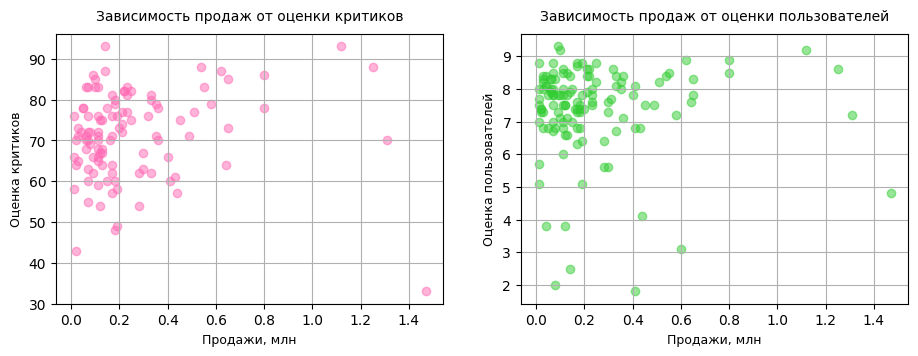

         Kоэффициент корреляции Пирсона для оценки критиков: 0.094
         Kоэффициент корреляции Пирсона для оценки пользователей: -0.004


                                                             3DS


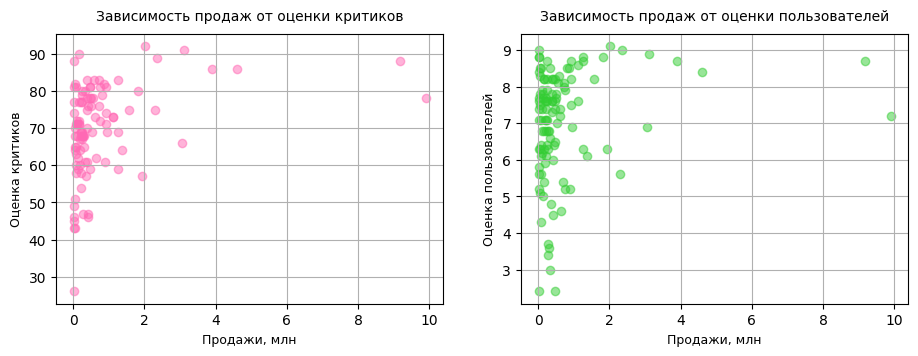

         Kоэффициент корреляции Пирсона для оценки критиков: 0.321
         Kоэффициент корреляции Пирсона для оценки пользователей: 0.198


                                                             WiiU


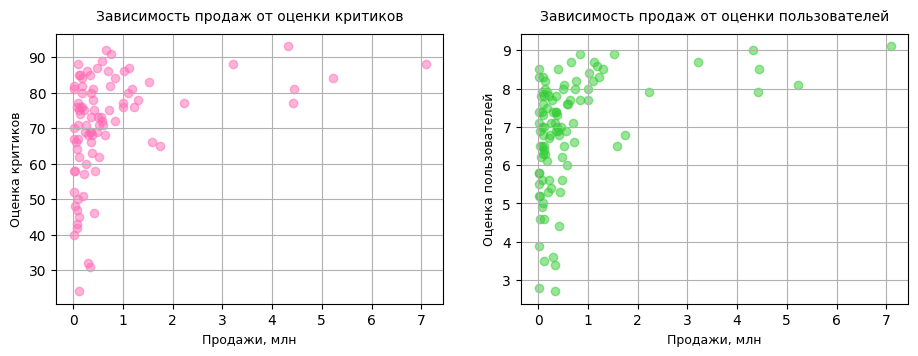

         Kоэффициент корреляции Пирсона для оценки критиков: 0.348
         Kоэффициент корреляции Пирсона для оценки пользователей: 0.400



In [42]:
for platform in platform_list:
    df_2012_2016_platform = df_2012_2016[df_2012_2016['platform'] == platform]
    print()
    print('                                                            ', platform)
    fig = plt.figure()
    plt.subplots_adjust(hspace=0.5)
    ax_1 = fig.add_subplot(1, 2, 1)
    ax_2 = fig.add_subplot(1, 2, 2)
    
    ax_1.scatter(df_2012_2016_platform['total_sales'], 
                 df_2012_2016_platform['critic_score'],
                 color = 'hotpink',
                 alpha=0.5)
    ax_1.grid()
    ax_1.set_title('Зависимость продаж от оценки критиков', fontsize = 10,
                  loc = "center", pad = 10)
    ax_1.set_xlabel('Продажи, млн', fontsize = 9)
    ax_1.set_ylabel('Оценка критиков', fontsize = 9)
    
    ax_2.scatter(df_2012_2016_platform['total_sales'], 
                 df_2012_2016_platform['user_score'], 
                 color = 'limegreen',
                 alpha=0.5)
    ax_2.grid()
    ax_2.set_title('Зависимость продаж от оценки пользователей', fontsize = 10,
                  loc = "center", pad = 10)
    ax_2.set_xlabel('Продажи, млн', fontsize = 9)
    ax_2.set_ylabel('Оценка пользователей', fontsize = 9)
    
    fig.set_figwidth(11)
    fig.set_figheight(3.5)
    
    plt.show()
    
    corr_df_2012_2016_crit = df_2012_2016_platform['total_sales'].corr(df_2012_2016_platform['critic_score'])
    print(f'         Kоэффициент корреляции Пирсона для оценки критиков: {corr_df_2012_2016_crit:.3f}')

    corr_df_2012_2016_user = df_2012_2016_platform['total_sales'].corr(df_2012_2016_platform['user_score'])
    print(f'         Kоэффициент корреляции Пирсона для оценки пользователей: {corr_df_2012_2016_user:.3f}')
    print()


В целом, можно сказать, что __отзывы очень слабо влияют на продажи__.

Для большинства платформ, в том числе и для непосредественно интерересующих нас PS4 и X360 наблюдается следующая картина.

Коэффициет корелляции для оценки критиков 0.3-0.4, то есть зависимость есть, но очень слабая.
Коэффициет корелляции для оценки пользователей колеблется в районе 0 и часто даже имеет отрицательное значение. Связи здесь нет никакой.

Платформа WiiU выделяется тем, что здесь корелляция для оценок критиков и пользователей с продажами примерно на одном уровне - 0.35-0.40. Хотя эта корелляция остается слабой.

### Жанры

Построим столбчатые диаграммы для количества игр по жанрам и продаж игр по жанрам.

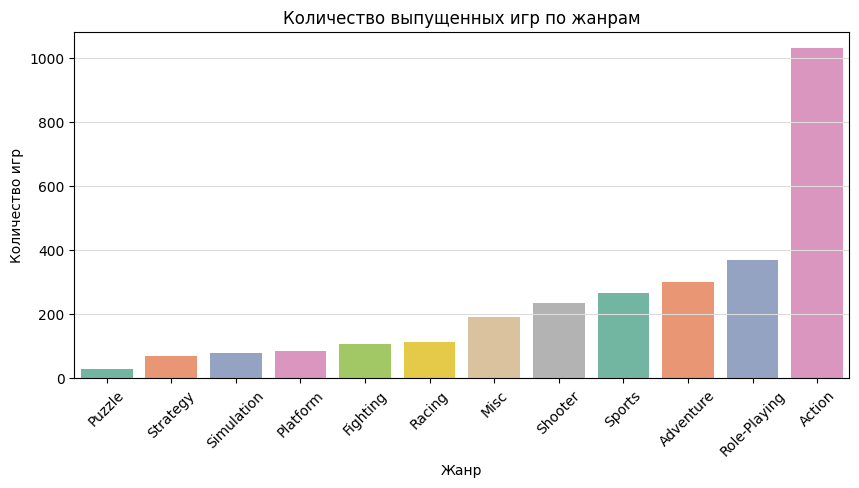

In [43]:
genre_grouped = df_2012_2016.groupby('genre')['genre'].count().sort_values()
genre_bar = fig = plt.figure(figsize=(10, 4.5))

palette = sns.color_palette("Set2")
genre_bar = sns.barplot(x=genre_grouped.index, y=genre_grouped, palette=palette)

genre_bar.set(title='Количество выпущенных игр по жанрам')
genre_bar.grid(axis = 'y', color = 'gainsboro')

genre_bar.set_ylabel('Количество игр')
genre_bar.set_xlabel('Жанр')
plt.xticks(rotation=45)

plt.show()

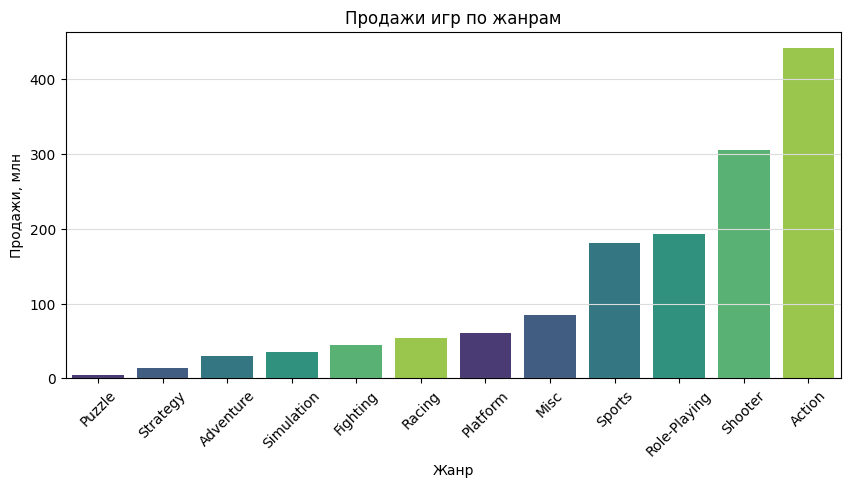

In [44]:
genre_grouped_sales = df_2012_2016.groupby('genre')['total_sales'].sum().sort_values()
genre_bar = fig = plt.figure(figsize=(10, 4.5))

palette = sns.color_palette("viridis")
genre_bar = sns.barplot(x=genre_grouped_sales.index, y=genre_grouped_sales, palette=palette)

genre_bar.set(title='Продажи игр по жанрам')
genre_bar.grid(axis = 'y', color = 'gainsboro')

genre_bar.set_ylabel('Продажи, млн')
genre_bar.set_xlabel('Жанр')
plt.xticks(rotation=45)

plt.show()

Как видно из графиков, некоторые жанры оказываются более прибыльными, несмотря на меньшее количество игр в них.

Игры жанра экшен лидируют и по количеству игр и по продажам. 
Стрелялки очень популярны, и зарабатывают значительное количетво денег, не смотря на то, что их выпускается не так много. Скорее всего, значительный вклад в продажи этого жанра вносят несколько очень популярных игр.
Приключенеских игр выпускается довольно много, однако они "на любителя", и их продажи не высовки.
Меньше всего выпускается пазлов.

### Портрет пользователя для каждого региона

#### Популярные платформы и жанры в регионах

Теперь посмотрим, как различаются предпочтения пользователей в разных регионах. В наборе данные есть информаця о трех регионах:
 - Северная Америка (NA)
 - Европа (EU)
 - Япония (JP)
 
Посмотрим, какие платформы и какие жанры пользуются наибольшей популярностью в разных частях света. Для этого построим круговые диаграмы, характеризующие среднестатистический портрет любителя компьютерных игр.

In [45]:
df_NA = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
df_NA_other = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).tail(26).sum()
df_NA_other_row = {'other': df_NA_other}
df_NA_platform = df_NA.append(pd.Series(df_NA_other_row))

df_EU = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
df_EU_other = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).tail(26).sum()
df_EU_other_row = {'other': df_EU_other}
df_EU_platform = df_EU.append(pd.Series(df_EU_other_row))

df_JP = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
df_JP_other = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).tail(26).sum()
df_JP_other_row = {'other': df_JP_other}
df_JP_platform = df_JP.append(pd.Series(df_JP_other_row))

In [46]:
df_NA_genre = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
df_NA_genre_other = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).tail(7).sum()
df_NA_genre_other_row = {'other': df_NA_genre_other}
df_NA_genre = df_NA_genre.append(pd.Series(df_NA_genre_other_row))

df_EU_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
df_EU_genre_other = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).tail(7).sum()
df_EU_genre_other_row = {'other': df_EU_genre_other}
df_EU_genre = df_EU_genre.append(pd.Series(df_EU_genre_other_row))

df_JP_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
df_JP_genre_other = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).tail(7).sum()
df_JP_genre_other_row = {'other': df_JP_genre_other}
df_JP_genre = df_JP_genre.append(pd.Series(df_JP_genre_other_row))

In [47]:
NA = [df_NA_platform, df_NA_genre]
EU = [df_EU_platform, df_EU_genre]
JP = [df_JP_platform, df_JP_genre]

regions = [['Северная Америка', NA], ['Европа', EU], ['Япония', JP]]


                                                      Северная Америка


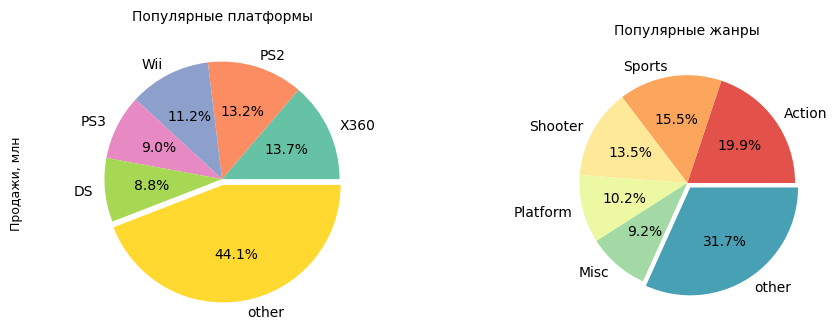


                                                      Европа


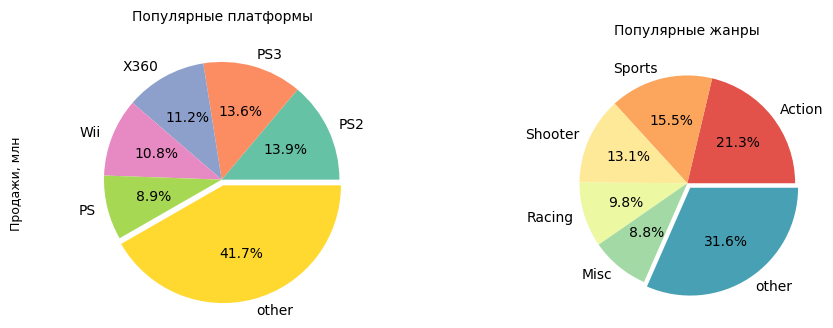


                                                      Япония


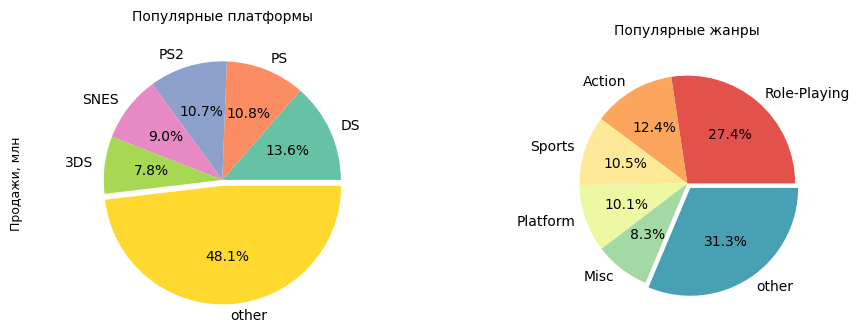

In [48]:
for data in regions:
    print()
    print('                                                     ', data[0])
    fig = plt.figure()
    plt.subplots_adjust(hspace=0.5)
    ax_1 = fig.add_subplot(1, 2, 1)
    ax_2 = fig.add_subplot(1, 2, 2)
    
    explode = (0, 0, 0, 0, 0, 0.05)
    colors_1 = sns.color_palette("Set2")
    colors_2 = sns.color_palette("Spectral")
    
    ax_1.pie(data[1][0], labels=data[1][0].index, explode = explode, autopct='%1.1f%%', colors=colors_1)
    ax_1.set_title('Популярные платформы', fontsize = 10,
                      loc = "center", pad = 20)
    ax_1.set_ylabel('Продажи, млн', fontsize = 9)
    ax_1.axis('equal') 
    
    ax_2.pie(data[1][1], labels=data[1][1].index, explode = explode, autopct='%1.1f%%', colors=colors_2)
    ax_2.set_title('Популярные жанры', fontsize = 10,
                      loc = "center", pad = 10)
    ax_2.set_ylabel('', fontsize = 9)
    
    fig.set_figwidth(11)
    fig.set_figheight(3.5)
    
    plt.show()

По диаграммам видно, что между пользователями Северной Америки и Европы много сходства, однако в структуре предпочтенй японцев есть несколько существенных отличий.

В первую четверку самых популярынх платформ как в Европе, так и в Америке в разной последовательности входят X360, PS2, PS3, Wii. В сумме они составляют около 50% рынка.
В Японии из этого списка популярна только PS2. Самой же популярой платформой здесь является DS (13.6%). В Америке она находится на пятом месте (8.8%). В стране восходящего солнца также популярны PS (10.8%), SNES (9%), 3DS (7,8%).
PS также популярна в Европе (8,9%).

Сравним продажи по платформам для разных регионов в абсолютных величинах:

In [49]:
print()
print('Северная Америка')
df_NA


Северная Америка


platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

In [50]:
print()
print('Европа')
df_EU


Европа


platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

In [51]:
print()
print('Япония')
df_JP


Япония


platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64

Из приведенных табличек видно, что рынок компьютерных игр Японии примерно в два раза меньше, чем рынок Европы, и в три раза меньше, чем рынок в Северной Америке. Это стоит учитывать при прогнозе на 2017 год. Так, например, платформа DS, занимающая первое место в Японии, собирает в этой стране в два раза меньше денег, чем в Америке, где она занимает пятое место.

Теперь проанализируем популярность различных жанров.

In [52]:
print()
print('Северная Америка')
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)


Северная Америка


genre
Action          863.17
Sports          671.20
Shooter         584.83
Platform        444.44
Misc            399.57
Racing          356.86
Role-Playing    330.04
Fighting        220.51
Simulation      180.40
Puzzle          121.13
Adventure       101.52
Strategy         67.75
Name: na_sales, dtype: float64

In [53]:
print()
print('Европа')
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)


Европа


genre
Action          510.99
Sports          371.33
Shooter         314.52
Racing          234.49
Misc            210.60
Platform        199.39
Role-Playing    188.24
Simulation      113.35
Fighting         99.00
Adventure        63.20
Puzzle           49.78
Strategy         44.79
Name: eu_sales, dtype: float64

In [54]:
print()
print('Япония')
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)


Япония


genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Fighting         87.28
Simulation       63.64
Puzzle           56.68
Racing           56.63
Adventure        52.24
Strategy         49.30
Shooter          38.68
Name: jp_sales, dtype: float64

Первая тройка в Европе и в Северной Америке одинакова. Это Экшен, спортивные игры и стрелялки. Причем игры жанра экшен занимают пятую часть всего рынка.  
В Японии же четвертую часть рынка занимают ролевые игры. Они пододвигают на второе и третье место экшен и спортивные игры. А стрелялки в Японии находятся на последнем месте, как видно из табличек приведенных ниже.  
Возможно причина такой разницы в особом менталитете жителей Страны восходящего солнца.

#### Рейтинги в регионах

ESRB (Entertainment Software Rating Board) - это негосударственная организация, которая занимается определеним рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Расшифруем обозначения рейтинга:
 - EC - «Для детей младшего возраста»: Игра подходит для детей от 3 лет
 - E - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет
 - E10+ - «Для всех от 10 лет и старше»
 - T - «Подросткам»: Игра подходит для лиц от 13 лет
 - M - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет
 - AO - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
 - RP - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга
 
В нашем наборе большому количеству игр не присвоена ни одна из категорий. Возможно, это игры, произведенные в других странах, где есть свои системы оценивания. Так в Европе действует система PEGI, а в Японии CERO.
 
 Для того, чтобы учесть в анализе игры без категорий, присвоим им значение "No rating".

In [55]:
df.loc[df['rating'].isna(), 'rating'] = 'No rating'

In [56]:
df['rating'].value_counts()

No rating    6259
E            4079
T            3032
M            1621
E10+         1441
EC             10
AO              1
RP              1
Name: rating, dtype: int64

Как видно, в категориях EC, PR, AO совсем немного значений.

Построим столбчатые диаграммы, отображающие, с каким рейтингом игры пользуются наибольшей популярностью в рассматриваемых регионах.

In [57]:
regions_columns = [['Северная Америка', 'na_sales'], ['Европа', 'eu_sales'], ['Япония', 'jp_sales']]


                                                   Северная Америка


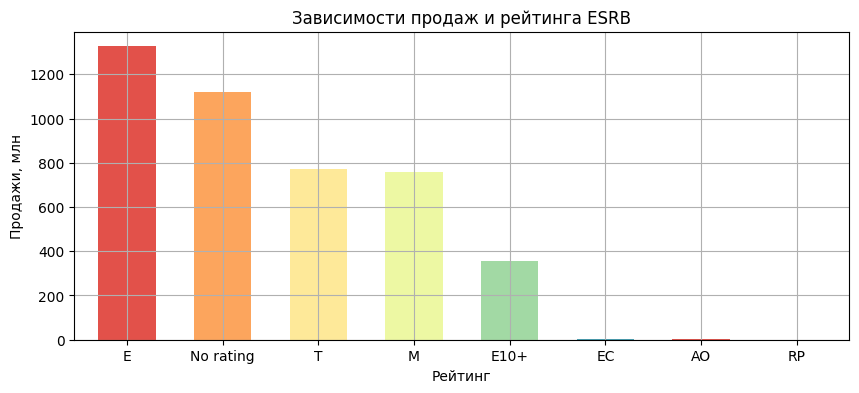


                                                   Европа


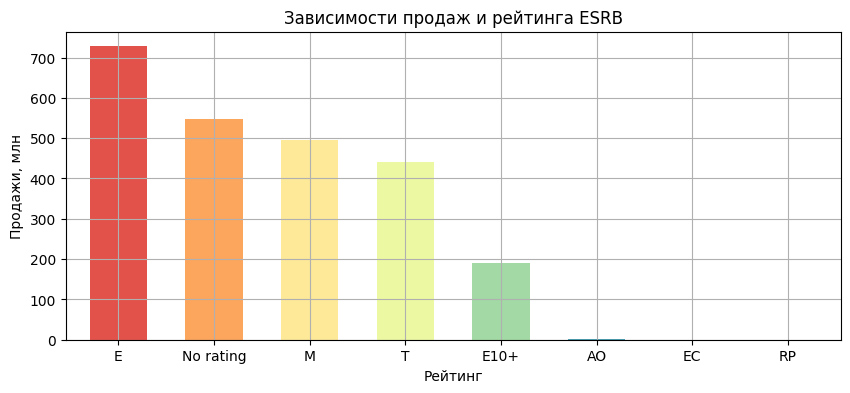


                                                   Япония


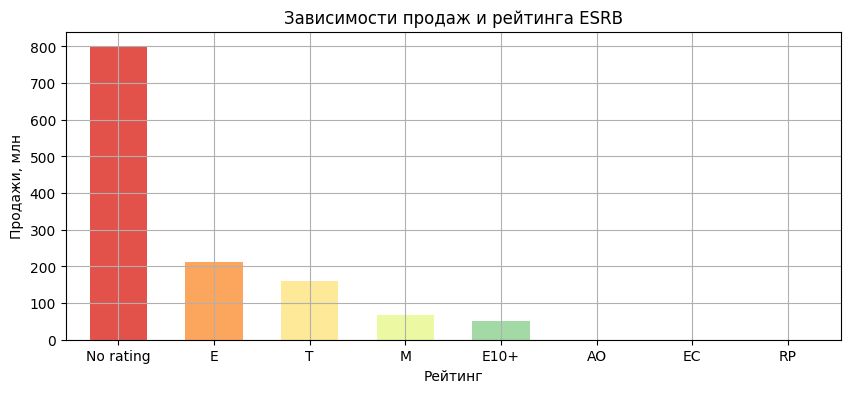

In [58]:
for region in regions_columns:
    print()
    print('                                                  ', region[0])
    
    colors_3 = sns.color_palette("Spectral")
    (
        df.groupby('rating')[region[1]].sum().sort_values(ascending=False)
        .plot(kind='bar', 
              grid=True, 
              figsize=(10, 4), 
              width = 0.6, 
              color = colors_2,
              title='Зависимости продаж и рейтинга ESRB',
              xlabel = 'Рейтинг',
              ylabel = 'Продажи, млн')
    )

    plt.xticks(rotation=0)
    plt.show()

Рынок Северной Америки больше европйского, однак по структуре они похожи. И там и там на первом месте игры категории E - для всех от 6 лет.  
На втором месте находятся игры без рейтинга, скорее всего, это игры произведенные не в Северной Америке. 
Второе и третье места занимают игры для подростков и для взрослых от 17 лет. В Америке их показатели почти равны, а в Европе игры для взростых немного более популярны чем игры для подростков. На пятом месте находятся игры категории E10+. 

А в Японии первое место занимают игры без рейтинга. Далее идут игры категории E, T, M, E10+.

В категорях AO, EC и RP настолько мало значений, что их не видно на диаграммах. Посмотрим как они распределены по регионам с помощью таблицы.

In [59]:
df_rating_aoecpd = df[['na_sales', 'eu_sales', 'jp_sales', 'rating']]
df_rating_aoecpd.loc[((df_rating_aoecpd['rating'] == 'AO') 
               | (df_rating_aoecpd['rating'] == 'EC') 
               | (df_rating_aoecpd['rating'] == 'RP'))].groupby('rating').sum()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.0
EC,2.04,0.11,0.0
RP,0.00,0.03,0.0


Как видно, в Японии игры этих категорий не продаются. 

В Америке больше представлены игры для детей от 3 лет (EC) и меньше - игры 18+ (AO). А в Европе - наоборот.

Чтобы еще наглядней посмотреть какую долю игры с разными райтингами занимают в структуре рынка рассматриваемых регионов, построим круговые диаграммы.

In [60]:
df_rating = df[df.columns]
df_rating.loc[((df_rating['rating'] == 'AO') 
               | (df_rating['rating'] == 'EC') 
               | (df_rating['rating'] == 'RP')), 'rating'] = 'AO EC RP'



                                  Зависимости продаж и рейтинга ESRB



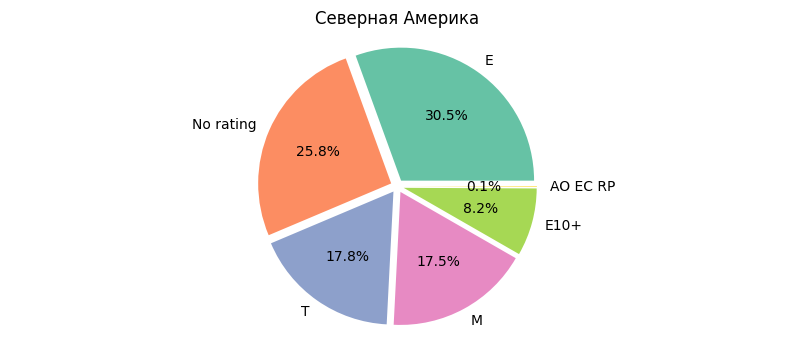

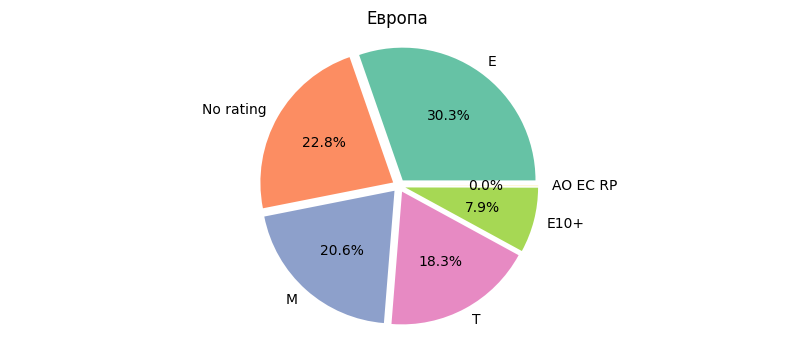

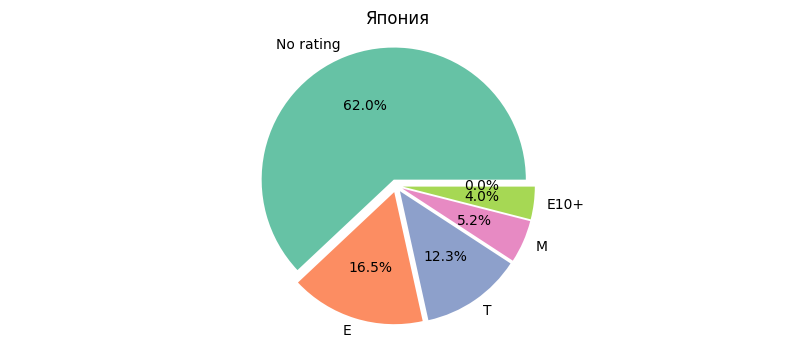

In [61]:
print()
print()
print(('\033[1m' + '                                  Зависимости продаж и рейтинга ESRB' + '\033[0m'))
print()

for region in regions_columns:

    explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
    (
        df_rating.groupby('rating')[region[1]].sum().sort_values(ascending=False)
        .plot(kind='pie', 
              grid=True, 
              figsize=(10, 4), 
              title=region[0], 
              explode = explode, 
              autopct='%1.1f%%',
              colors=colors_1,
              ylabel='')
    )
#    set_ylabel('Продажи, млн', fontsize = 9)
    plt.axis('equal') 
    plt.show()

Диаграммы подтверджают, что рынки структуры рынков Северной Америки и Европы очень похожи. Игры без рейтингов в них занимают около 25%.  
В Японии же игры без рейтингов ESRB составляют 62%. Вероятно, это игры местного производства, рейтинг которых определяет японская организация.

### Итоги исследовательского анализа

Анализ предоставленных данных позволил установить ряд закономерностей, которые будут полезны при планировании стратегии интернет-магазина на 2017 год.

Прежде всего на основании анализа количества выпускаемых в год игр и динамики популярности различных платформ был установлен актуальных период, данные за который можно экстраполировать на 2017 год. Это период __с 2012 по 2016 гг__.

При анализе этого периода было выбрано две потенциально прибыльные платформы __XOne__ и __PS4__. Продажи на этих платформах должны расти и достигнуть пика в ближайшие 2 года. Наибольши потенциалом обладает PS4.

Для большинство игр на успешных платформах годовой __доход составляе до 2 миллионов__.

При выборе потенциально прибыльных игр не стоит опираться на __оценки зрителей__, они __совершенно не влияют__ на продажи. Исключение составляет платформа Wii, но и здесь влияние не сильное.

__Оцека критиков немного отражает__ потенциал игры, но не всегда. На эту характеристику можно опираться лишь как на дополнительный критерий оценки.

Наиболее перспективный жанр - это __Action__, на __японском рынке - Role-Playing__. Высоки продажи также в жанрах __Shootter_, __Sports__, __Music__.  


Выгодней всего продавать игры, подходящие для всех от 6 лет - категория __"E"__. Стоит также обрать внимание на игры категорий __"M"__ и __"T"__.

## Статистический анализ

### Гипотезы

Воспользуемся методами статистического анализа, чтобы определить сходны ли между собой средние показатели пользовательских оценок на разных платформах, оценок критиков на разных платформах, оценок пользователей для разных жанров.

В данном случае мы будем сравнивать средние двух выборок. Для этой задачи в питоне используется специальный метод scipy.stats.ttest_ind().

#### Пользовательские рейтинги на платформах XOne и PC

Проверим, одинаковы ли пользовательские рейтинги на платформах XOne и PC.

Нулевая гипотеза:  
Средние пользоватеьлские рейтинги на игровых платформах XOne и PC одинаковы.

Альтернативная гипотеза:  
Средние пользовательские рейтинги на игровых платформах XOne и PC неодинаковы.

In [62]:
df_user_score = df.dropna(subset=['user_score']).reset_index(drop=True)

In [63]:
xone_score = df_user_score[df_user_score['platform'] == 'XOne']['user_score']
pc_score = df_user_score[df_user_score['platform'] == 'PC']['user_score']

alpha = .05

results = st.ttest_ind(xone_score, pc_score, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 4.538580296377178e-06
Отвергаем нулевую гипотезу


Результат показывает, что в зависимости от платформы, пользовательские рейтинги для одной и той же игры могут быть разными. Это может быть вызвано разными причинами. Например, у разных платформ немного разная аудитория, или какие-то игры больше подходят для одних платформ и не подходят для других.

#### Рейтинги критиков на платформах XOne и PC

Проверим, одинаковы ли оценки критиков на платформах XOne и PC.

Нулевая гипотеза:  
Средние оценки критиков на игровых платформах XOne и PC одинаковы.

Альтернативная гипотеза:  
Средние оценки критикови на игровых платформах XOne и PC неодинаковы.

In [64]:
df_critic_score = df.dropna(subset=['critic_score']).reset_index(drop=True)

In [65]:
xone_score = df_critic_score[df_critic_score['platform'] == 'XOne']['critic_score']
pc_score = df_critic_score[df_critic_score['platform'] == 'PC']['critic_score']

alpha = .05

results = st.ttest_ind(xone_score, pc_score, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.01703439223856622
Отвергаем нулевую гипотезу


Результат показывает, что в зависимости от платформы, оценки критикови для одной и той же игры могут быть разными.

#### Пользовательские рейтинги игр жанров Action и Sports

Проверим, одинаковы ли пользовательские рейтинги для игр жанров Action и Sports.

Нулевая гипотеза:  
Средние пользоватеьлские рейтинги для игр жанров Action и Sports одинаковы.

Альтернативная гипотеза:  
Средние пользоватеьлские рейтинги для игр жанров Action и Sports неодинаковы.

In [66]:
action_score = df_user_score[df_user_score['genre'] == 'Action']['user_score']
sports_score = df_user_score[df_user_score['genre'] == 'Sports']['user_score']

alpha = .05

results = st.ttest_ind(action_score, sports_score, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Результат говорит о том, что пользовательские оценки не зависят от жанра игры. В каждой категории находятся как хорошие игры, так и те, которые нравятся пользователям меньше.

### Итоги статистического анализа

Статистический анализ позволил сделать выводы о зависимости оценок пользователей и критиков от разных платформ и разных жанров.

Для разных игровых платформ характерны свои особенности. Оценки одной и той же игры могут быть разным на разных платформах.  

Жанр игры никак не влияет на пользовательские рейтинги. Как хорошую, так и плохую игру можно найти в любом жанре.

## Выводы

По результатам проделанной работы удалось выявить закономерности, на основании которых можно будет подобрать ассортимент игр на 2017 год.


1. Потенциально прибыльные платформы на 2017 год - __XOne__ и __PS4__. Продажи на этих платформах должны расти и достигнуть пика в ближайшие 2 года. Наибольши потенциалом обладает PS4.

2. Наиболее перспективный жанр - это __Action__, на __японском рынке - Role-Playing__. Высоки продажи также в жанрах __Shootter__, __Sports__, __Music__. Однако следует учесть, что в каждом жанре могут попадаться как популярные, так и не очень успешные игры. Дополнительным фактором, на который можно опереться выбирая игры по жанрам - оценка критиков. Хотя влияние оценок не сильно, и на каждой платформе свои особенности рейтингов.

3. Выгодней всего продавать игры, подходящие для всех от 6 лет - категория __"E"__. Стоит также обрать внимание на игры категорий __"M"__ и __"T"__.

4. При выборе потенциально прибыльных игр не стоит опираться на оценки зрителей, они совершенно не влияют на продажи. Исключение составляет платформа Wii, но и здесь влияние не сильное. __Оцека критиков немного отражает__ потенциал игры, но не всегда. На эту характеристику можно опираться лишь как на дополнительных критерий оценки.

5. Для большинства игр на успешных платформах годовой __доход составляе до 2 миллионов__. Однако есть отдельные игры, продажи которых __могут быть по 10-15 млн в год__. Именно на такие игры стоит обратить внимание в первую очередь.